<a href="https://colab.research.google.com/github/diegoflorescba/MentoriaCripto2022-Grupo2/blob/main/3tp_aprendizajeAutomatico/Aprendizaje_supervisado_Diego_fpl_mmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selección de cripto activos para una cartera de inversión

![picture](https://drive.google.com/uc?export=view&id=1ihM3JEKP-XPaoX9b5bwymu_IF4ntTlz-)

# Trabajo Práctico 3 -  Aprendizaje Supervisado

# Introducción

Una tarea fundamental en el modelado financiero es la predicción del comportamiento de los precios en un futuro cercano. Usando la serie de precios histórica de los activos como datos de entrenamiento, deseamos predecir si el precio subirá o no, y en qué medida, es decir, nos interesa también el rendimiento.

La predicción de retornos de criptoactivos es un gran desafío para la comunidad de aprendizaje automático debido a la alta volatilidad de los activos, la manipulación del mercado y la naturaleza no estacionaria de los datos, entre otras cuestiones.  

En este práctico aplicaremos algunas técnicas de aprendizaje automático supervisado para predecir el movimiento de activos, a partir de los features que hemos trabajado en el práctico anterior. Exploraremos modelos simples de regresión y clasificación. Para validar los modelos procedemos a evaluar su bondad de ajuste, es decir, que "tan bueno" es el poder predictivo del modelo y comparar su desempeño.

📌 **Conjunto de Entrenamiento y Test**

Para entrenar modelos de ML y seleccionar el más adecuado, debemos particionar los datos en conjuntos de entrenamiento y test (o entrenamiento, validación y test). Si bien la práctica más habitual es seleccionar estos conjuntos al azar, esta metodología no es conveniente cuando trabajamos con series de tiempo, ya que romper la estructura de los datos significa romper la autocorrelación, que es lo que da sentido al análisis. Frente a esto, una posibilidad es realizar la división de datos a partir del procedimiento [Walk-Forward Validation](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/), otra es implementar lo que se conoce como [timeSeriesSplit](https://scikit-learn.org/stable/modules/cross_validation.html#time-series-split).

¡Los invito a indagar sobre estas metodologías!


📌 **Variables Predictoras**

Los predictores son datos que consideramos relevantes para el comportamiento del mercado. En nuestro caso, trabajaremos con los indicadores técnicos calculados en el trabajo práctico anterior y algunos que sumaremos al análisis, pero estos pueden ser muy diversos, como datos de sentimiento, datos de amplitud, datos básicos, gubernamentales, etc., que nos ayudarán a hacer nuestras predicciones. 



📌 **Modelo Baseline**

Establecer un baseline es esencial para cualquier problema de predicción. Este modelo nos brinda un punto de comparación, nos da una idea de cuan bien otros modelos rindieron en el problema en cuestión.

Si la performance de un modelo no alcanza o es similiar a la del baseline, entonces debemos seguir trabajando para mejorar el modelo u optar por algún otro. Nuestro baseline debe ser fácil de implementar y naive. 


Algunas opciones simples para baseline: [link](https://medium.com/analytics-vidhya/benchmarking-methods-for-deep-learning-based-time-series-forecast-ec45f78b61e2).

# 📖 ¡Actividades!

En este práctico evaluaremos el potencial de modelos predictivos simples sobre algunos activos. Esta será la base para construir una canasta de activos con riesgo controlado. 

**Objetivo: predecir el movimiento del precio de cada activo para los próximos n días (tomaremos n=1, n=7)**

## Parte 0 - Feature Engineer

Los invito a explorar y agregar otras características además de las trabajadas anteriormente. Como en el práctico pasado, pueden usar la librería talib o calcularlos ustedes.

- [Indicadores técnicos](https://coinmarketcap.com/alexandria/article/technical-analysis-101-the-best-technical-indicators-for-crypto-and-stocks)
- [Indicadores técnicos en python](https://towardsdatascience.com/building-a-comprehensive-set-of-technical-indicators-in-python-for-quantitative-trading-8d98751b5fb)

## Parte I - Clasificación

Por ahora nos concentraremos en predecir si el precio del activo subirá o bajará (es decir, si el retorno a n días será positivo o negativo). Para ello entrenaremos algunos modelos de clasificación.

- DecisionTreeClassifier
- RandomForestClassifier
- XGBClassifier

En este caso, podemos definir nuestro target como 1 o 0:

- Si el rendimiento a n días fue positivo el target tomará el valor 1.
- Si el rendimiento a n días fue negativo o cero el target tomará el valor 0.

Utilicen métricas adecuadas para la evaluación de los modelos (accuracy, recall, precision, etc) 


## Parte II - Regresión

Ahora nuestro objetivo es implementar modelos sobre los activos para predecir su tasa de cambio (ya sea respecto al precio open o close). Consideren los modelos de regresión:

- Desicion tree
- Randon Forest
- XGBoost


Evalúen los resultados, con algunas métricas útiles, tales como Error Cuadrático Medio (RMSE) y el Error Absoluto Medio (MAE). ¿Qué pueden decir?


### ¡Para tener en cuenta!

- Para los modelos de regresión y clasificación elijan un modelo baseline.
- Definir periodos de entrenamiento y test: utilizar librerías adecuadas para series de tiempo.
- Dado el periodo de entrenamiento, chequeen si los datos están balaceados.  
- Analicen la necesidad de estandarizar los datos, según los modelos empleados.
- Ajuste de hiperparámetros de los modelos: dado que los parámetros pueden tomar valores en un amplio rango es recomendable uilizar GridSearchCV. 



## Opcional - Predicción usando Long short-term memory (LSTM)

Las redes de este tipo son adecuadas para clasificar, procesar y hacer predicciones basadas en datos de series temporales, ya que pueden almacenar información pasada. Esto es importante en nuestro caso porque el precio anterior de una acción es crucial para predecir su precio futuro.

Comparen la performance de los modelos anteriores (regresión y/o clasificación) con una red neuronal recurrente (LSTM). 

# Fecha de entrega

- __Versión preliminar: 29/7__ 

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 

In [1]:
import pandas as pd
import numpy as np

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from pylab import rcParams
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

from pandas import Series, DataFrame
import math

import seaborn as sns
import os
import time
import missingno as msno

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score,f1_score, mean_absolute_error, mean_squared_error

import xgboost as xgb

!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib as ta

import datetime as dt

import warnings
warnings.filterwarnings("ignore") 

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


[WinError 2] El sistema no puede encontrar el archivo especificado: 'ta-lib'
C:\Users\Dicsys\Documents\Diplomado\MentoriaCripto2022-Grupo2\3tp_aprendizajeAutomatico


tar: Error opening archive: Failed to open 'ta-lib-0.4.0-src.tar.gz'
"." no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"make" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"make" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [2]:
import talib as ta

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/diegoflorescba/MentoriaCripto2022-Grupo2/main/2tp_analisisYCuracion/Activos%20limpios%20con%20features%20-%202tp%20-%20Final.csv', index_col = 'Fecha')

In [ ]:
df.head(10)

,open,high,low,close,volume,active,day,month,year,weekday,...,ADX200,STOCH_SLOWK,STOCH_SLOWD,MACD,SMA_5,SMA_15,SMA_ratio,SMA5_Volume,SMA15_Volume,SMA_Volume_Ratio
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-01-01 03:00:00,0.34640,0.35368,0.34617,0.35073,5.565085e+06,XRPUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,130.72000,134.00000,130.71000,133.36000,4.847789e+04,ETHUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,2.52060,2.56000,2.52040,2.53830,4.744196e+05,EOSUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,0.03988,0.04068,0.03985,0.04061,1.281178e+07,ADAUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,29.73000,30.16000,29.57000,30.12000,1.034450e+04,LTCUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,7.37400,7.43000,7.35200,7.40900,3.906782e+04,NEOUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,5.93170,5.95460,5.85000,5.95030,2.516747e+05,BNBUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,4.94190,5.11270,4.93790,5.04560,4.550184e+04,ETCUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,3690.00000,3720.00000,3685.78000,3703.56000,3.346850e+03,BTCUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df.drop(columns=[ 'EMA200', 'EMA100', 'EMA50','EMA20', 'RSI200', 'ADX200', 'MACD'], inplace=True)

## Parte 0 - Feature Engineer

### Funciones

In [ ]:
def _extract_close(data, active):
    values = None

    if isinstance(data, Series):
        values = data.values
    else:
        if "close" in data.columns:
            values = data[data['active'] == active]['close']

    if values is None:
        raise ValueError(
            "data must be Pandas Series or DataFrame with a 'last' or 'close' column")

    return values

In [ ]:
def _extract_high(data, active):
    values = None

    if isinstance(data, Series):
        values = data.values
    else:
        if "high" in data.columns:
            values = data[data['active'] == active]['high']

    if values is None:
        raise ValueError(
            "data must be Pandas Series or DataFrame with a 'last' or 'close' column")

    return values

In [ ]:
def _extract_low(data, active):
    values = None

    if isinstance(data, Series):
        values = data.values
    else:
        if "low" in data.columns:
            values = data[data['active'] == active]['low']

    if values is None:
        raise ValueError(
            "data must be Pandas Series or DataFrame with a 'last' or 'close' column")

    return values

In [ ]:
def STOCHRSI(data, active):
    closing_prices = _extract_close(data, active)
    return ta.STOCHRSI(closing_prices) 

In [ ]:
def EMA(data, period, active):
    closing_prices = _extract_close(data, active)
    return ta.EMA(closing_prices, period)

In [ ]:
def RSI(data, period, active):
    closing_prices = _extract_close(data, active)
    return ta.RSI(closing_prices, period)

In [ ]:
def ADX(data, period, active):
    closing_prices = _extract_close(data, active)
    high_prices = _extract_high(data, active)
    low_prices = _extract_low(data, active)
    return ta.ADX(high_prices, low_prices, closing_prices, period)

In [ ]:
def MACD(data, active, fastperiod = 12, slowperiod = 26, signalperiod  = 9):
    closing_prices = _extract_close(data, active)
    return ta.MACD(closing_prices, fastperiod, slowperiod, signalperiod)[0]

In [ ]:
def STOCH(data, active):
    closing_prices = _extract_close(data, active)
    high_prices = _extract_high(data, active)
    low_prices = _extract_low(data, active)
    return ta.STOCH(high_prices, low_prices, closing_prices)

In [ ]:
def add_target_n_steps(data, periods):
    target = data.rolling(periods).apply(lambda x: x.iloc[0])['close']
    return target

### Cálculo de indicadores

In [ ]:
for i in set(df.active):
    df.loc[df.active == i, 'EMA5'] = EMA(df, 5, i)
    df.loc[df.active == i, 'EMA15'] = EMA(df, 15, i)
    df.loc[df.active == i, 'EMA50'] = EMA(df, 50, i)
    df.loc[df.active == i, 'EMA100'] = EMA(df, 100, i)
    df.loc[df.active == i, 'EMA200'] = EMA(df, 200, i)
    df.loc[df.active == i, 'RSI5'] = RSI(df, 5, i)
    df.loc[df.active == i, 'RSI15'] = RSI(df, 15, i)
    df.loc[df.active == i, 'RSI50'] = RSI(df, 50, i)
    df.loc[df.active == i, 'RSI100'] = RSI(df, 100, i)
    df.loc[df.active == i, 'RSI200'] = RSI(df, 200, i)
    df.loc[df.active == i, 'ADX5'] = ADX(df, 5, i)
    df.loc[df.active == i, 'ADX15'] = ADX(df, 15, i)
    df.loc[df.active == i, 'ADX50'] = ADX(df, 50, i)
    df.loc[df.active == i, 'ADX100'] = ADX(df, 100, i)
    df.loc[df.active == i, 'ADX200'] = ADX(df, 200, i)
    df.loc[df.active == i, 'STOCH_SLOWK'], df.loc[df.active == i, 'STOCH_SLOWD'] = STOCH(df, i)
    df.loc[df.active == i, 'MACD'] = MACD(df, i)

df

,open,high,low,close,volume,active,day,month,year,weekday,...,ADX200,STOCH_SLOWK,STOCH_SLOWD,MACD,SMA_5,SMA_15,SMA_ratio,SMA5_Volume,SMA15_Volume,SMA_Volume_Ratio
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-01-01 03:00:00,0.34640,0.35368,0.34617,0.35073,5.565085e+06,XRPUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,130.72000,134.00000,130.71000,133.36000,4.847789e+04,ETHUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,2.52060,2.56000,2.52040,2.53830,4.744196e+05,EOSUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,0.03988,0.04068,0.03985,0.04061,1.281178e+07,ADAUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,29.73000,30.16000,29.57000,30.12000,1.034450e+04,LTCUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02 11:00:00,30.09000,31.00000,29.91000,30.84000,2.099238e+05,AXSUSDT,2,5,2022,Monday,...,5.405922,27.455252,35.588711,-1.980730,31.0060,31.412000,1.013094,1.690649e+05,2.517633e+05,0.671523
2022-05-02 11:00:00,38711.87000,39155.47000,38242.51000,38840.00000,1.745554e+04,BTCUSDT,2,5,2022,Monday,...,4.968616,76.953079,77.404507,-137.983866,38681.2480,38350.076667,0.991438,8.922673e+03,7.053100e+03,1.265071
2022-05-02 11:00:00,2.07100,2.10900,2.03400,2.09400,3.760029e+06,EOSUSDT,2,5,2022,Monday,...,6.256037,48.181818,56.219706,-0.055727,2.0912,2.109800,1.008894,2.650436e+06,2.843629e+06,0.932061


Voy a agregar el calculo de las medias simples de 5 y 15 períodos también tanto para el precio de cierre como para el volumen operado, y a su vez el ratio que existe entre éstas.

In [ ]:
df['SMA_5'] = df.groupby('active')['close'].transform(lambda x: x.rolling(window = 5).mean())
df['SMA_15'] = df.groupby('active')['close'].transform(lambda x: x.rolling(window = 15).mean())
df['SMA_ratio'] = df['SMA_15'] / df['SMA_5']

In [ ]:
df['SMA5_Volume'] = df.groupby('active')['volume'].transform(lambda x: x.rolling(window = 5).mean())
df['SMA15_Volume'] = df.groupby('active')['volume'].transform(lambda x: x.rolling(window = 15).mean())
df['SMA_Volume_Ratio'] = df['SMA5_Volume']/df['SMA15_Volume']

In [ ]:
df.head(10)

,open,high,low,close,volume,active,day,month,year,weekday,...,ADX200,STOCH_SLOWK,STOCH_SLOWD,MACD,SMA_5,SMA_15,SMA_ratio,SMA5_Volume,SMA15_Volume,SMA_Volume_Ratio
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-01-01 03:00:00,0.34640,0.35368,0.34617,0.35073,5.565085e+06,XRPUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,130.72000,134.00000,130.71000,133.36000,4.847789e+04,ETHUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,2.52060,2.56000,2.52040,2.53830,4.744196e+05,EOSUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,0.03988,0.04068,0.03985,0.04061,1.281178e+07,ADAUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,29.73000,30.16000,29.57000,30.12000,1.034450e+04,LTCUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,7.37400,7.43000,7.35200,7.40900,3.906782e+04,NEOUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,5.93170,5.95460,5.85000,5.95030,2.516747e+05,BNBUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,4.94190,5.11270,4.93790,5.04560,4.550184e+04,ETCUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,3690.00000,3720.00000,3685.78000,3703.56000,3.346850e+03,BTCUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns


Index(['open', 'high', 'low', 'close', 'volume', 'active', 'day', 'month',
       'year', 'weekday', 'profit', 'real_volume', 'EMA5', 'EMA15', 'EMA50',
       'EMA100', 'EMA200', 'RSI5', 'RSI15', 'RSI50', 'RSI100', 'RSI200',
       'ADX5', 'ADX15', 'ADX50', 'ADX100', 'ADX200', 'STOCH_SLOWK',
       'STOCH_SLOWD', 'MACD', 'SMA_5', 'SMA_15', 'SMA_ratio', 'SMA5_Volume',
       'SMA15_Volume', 'SMA_Volume_Ratio'],
      dtype='object')

## Parte I - Clasificación

In [ ]:
df.isna().sum(), df.shape, (df.isna().sum().max()/df.shape[0])*100

(open                   0
 high                   0
 low                    0
 close                  0
 volume                 0
 active                 0
 day                    0
 month                  0
 year                   0
 weekday                0
 profit                 0
 real_volume            0
 EMA5                  76
 EMA15                266
 EMA50                931
 EMA100              1881
 EMA200              3781
 RSI5                  95
 RSI15                285
 RSI50                950
 RSI100              1900
 RSI200              3800
 ADX5                 171
 ADX15                551
 ADX50               1881
 ADX100              3781
 ADX200              7581
 STOCH_SLOWK          152
 STOCH_SLOWD          152
 MACD                 627
 SMA_5                 76
 SMA_15               266
 SMA_ratio            266
 SMA5_Volume           76
 SMA15_Volume         266
 SMA_Volume_Ratio     266
 dtype: int64, (116029, 36), 6.533711399736272)

Vemos que los valores nulos corresponden a los indicadores técnicos que agregamos como features para ser usados luego en los modelos que vamos a utilizar, por lo tanto corresponde eliminar estos valores nulos para poder tener el dataset limpio y completo.

df_btcCreamos un nuevo dataset unicamente con la información de BTC, para poder usarlo a modo de ejemplo con los modelos de clasificación que vamos a utilizar. A su vez, quitaremos los valores nulos usando la columna "ADX200", que al ser la que mayor cantidad de nulos tiene, nos aseguramos de que el dataset quede completo.

In [ ]:
df[df.active == 'BTCUSDT']

,open,high,low,close,volume,active,day,month,year,weekday,...,ADX200,STOCH_SLOWK,STOCH_SLOWD,MACD,SMA_5,SMA_15,SMA_ratio,SMA5_Volume,SMA15_Volume,SMA_Volume_Ratio
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-01-01 03:00:00,3690.00,3720.00,3685.78,3703.56,3346.849726,BTCUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 07:00:00,3703.63,3732.00,3696.14,3713.07,3200.719832,BTCUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 11:00:00,3713.07,3756.94,3684.21,3698.53,3324.094679,BTCUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 15:00:00,3698.28,3701.68,3642.00,3659.41,3089.291395,BTCUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 19:00:00,3659.56,3730.01,3659.56,3711.20,4906.805931,BTCUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,3697.154,NaN,NaN,3573.552313,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01 19:00:00,37934.90,38574.50,37686.26,38306.63,8032.850330,BTCUSDT,1,5,2022,Sunday,...,4.949401,53.222672,51.194825,-345.127995,38042.324,38330.314000,1.007570,6114.154710,7058.412212,0.866222
2022-05-01 23:00:00,38306.63,38810.73,38241.37,38621.62,7203.268160,BTCUSDT,1,5,2022,Sunday,...,4.955755,62.831011,55.263596,-291.402236,38176.116,38307.859333,1.003451,6436.298494,6639.152849,0.969446
2022-05-02 03:00:00,38621.62,39167.34,38600.03,38926.11,6201.491270,BTCUSDT,2,5,2022,Monday,...,4.959005,76.546117,64.199934,-221.698782,38356.088,38333.392667,0.999408,6925.002914,6212.899196,1.114617


In [ ]:
df_btc = df[df.active == 'BTCUSDT']
df_btc.dropna(subset=['ADX200'], inplace=True)
df_btc.isna().sum()

open                0
high                0
low                 0
close               0
volume              0
active              0
day                 0
month               0
year                0
weekday             0
profit              0
real_volume         0
EMA5                0
EMA15               0
EMA50               0
EMA100              0
EMA200              0
RSI5                0
RSI15               0
RSI50               0
RSI100              0
RSI200              0
ADX5                0
ADX15               0
ADX50               0
ADX100              0
ADX200              0
STOCH_SLOWK         0
STOCH_SLOWD         0
MACD                0
SMA_5               0
SMA_15              0
SMA_ratio           0
SMA5_Volume         0
SMA15_Volume        0
SMA_Volume_Ratio    0
dtype: int64

In [ ]:
df_btc.head()

,open,high,low,close,volume,active,day,month,year,weekday,...,ADX200,STOCH_SLOWK,STOCH_SLOWD,MACD,SMA_5,SMA_15,SMA_ratio,SMA5_Volume,SMA15_Volume,SMA_Volume_Ratio
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-03-08 15:00:00,3916.00,3920.03,3898.8,3913.18,5706.870808,BTCUSDT,8,3,2019,Friday,...,5.001531,75.137904,73.642460,27.943415,3905.918,3881.657333,0.993789,4766.429063,4519.051193,1.054741
2019-03-08 19:00:00,3911.45,3932.00,3800.0,3851.35,8787.576852,BTCUSDT,8,3,2019,Friday,...,4.981778,64.454563,71.811092,23.008093,3900.868,3881.347333,0.994996,5934.193692,4721.935905,1.256729
2019-03-08 23:00:00,3850.01,3890.00,3843.7,3884.99,6237.920984,BTCUSDT,8,3,2019,Friday,...,4.962124,59.478544,66.357004,21.562720,3895.172,3883.759333,0.997070,5924.011373,4793.027955,1.235964
2019-03-09 03:00:00,3884.56,3915.00,3866.8,3909.63,3879.360580,BTCUSDT,9,3,2019,Saturday,...,4.945618,62.113636,62.015581,22.150161,3895.030,3886.879333,0.997907,5658.623800,4777.914795,1.184329
2019-03-09 07:00:00,3910.79,3938.99,3906.0,3907.00,5357.547960,BTCUSDT,9,3,2019,Saturday,...,4.932100,74.807783,65.466655,22.148182,3893.230,3889.652000,0.999081,5993.855437,4970.960047,1.205774


Luego para el modelo de clasificación, vamos a intentar predecir si el precio a 5 períodos futuros aumenta o disminuye. Para esto, generamos una nueva columna llamada "target_5" y utilizamos la funcion "add_target_n_steps" que permite generar una nueva columna en base a la cantidad de periodos que querramos predecir.

In [ ]:
df_btc['target_5'] = add_target_n_steps(df_btc, 5)
df_btc

,open,high,low,close,volume,active,day,month,year,weekday,...,STOCH_SLOWK,STOCH_SLOWD,MACD,SMA_5,SMA_15,SMA_ratio,SMA5_Volume,SMA15_Volume,SMA_Volume_Ratio,target_5
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-03-08 15:00:00,3916.00,3920.03,3898.80,3913.18,5706.870808,BTCUSDT,8,3,2019,Friday,...,75.137904,73.642460,27.943415,3905.918,3881.657333,0.993789,4766.429063,4519.051193,1.054741,NaN
2019-03-08 19:00:00,3911.45,3932.00,3800.00,3851.35,8787.576852,BTCUSDT,8,3,2019,Friday,...,64.454563,71.811092,23.008093,3900.868,3881.347333,0.994996,5934.193692,4721.935905,1.256729,NaN
2019-03-08 23:00:00,3850.01,3890.00,3843.70,3884.99,6237.920984,BTCUSDT,8,3,2019,Friday,...,59.478544,66.357004,21.562720,3895.172,3883.759333,0.997070,5924.011373,4793.027955,1.235964,NaN
2019-03-09 03:00:00,3884.56,3915.00,3866.80,3909.63,3879.360580,BTCUSDT,9,3,2019,Saturday,...,62.113636,62.015581,22.150161,3895.030,3886.879333,0.997907,5658.623800,4777.914795,1.184329,NaN
2019-03-09 07:00:00,3910.79,3938.99,3906.00,3907.00,5357.547960,BTCUSDT,9,3,2019,Saturday,...,74.807783,65.466655,22.148182,3893.230,3889.652000,0.999081,5993.855437,4970.960047,1.205774,3913.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01 19:00:00,37934.90,38574.50,37686.26,38306.63,8032.850330,BTCUSDT,1,5,2022,Sunday,...,53.222672,51.194825,-345.127995,38042.324,38330.314000,1.007570,6114.154710,7058.412212,0.866222,37952.66
2022-05-01 23:00:00,38306.63,38810.73,38241.37,38621.62,7203.268160,BTCUSDT,1,5,2022,Sunday,...,62.831011,55.263596,-291.402236,38176.116,38307.859333,1.003451,6436.298494,6639.152849,0.969446,38026.25
2022-05-02 03:00:00,38621.62,39167.34,38600.03,38926.11,6201.491270,BTCUSDT,2,5,2022,Monday,...,76.546117,64.199934,-221.698782,38356.088,38333.392667,0.999408,6925.002914,6212.899196,1.114617,37991.17


Luego generamos la columna "target" basandonos en el valor de "target_5" y comparandolo con el valor de close, por lo cual genera un 1 si el valor es mayor y un 0 si el valor es menor.

In [ ]:
df_btc['target'] = df_btc.apply(lambda x: 1 if x['target_5'] < x['close'] else 0, axis = 1)
df_btc.head(7)

,open,high,low,close,volume,active,day,month,year,weekday,...,STOCH_SLOWD,MACD,SMA_5,SMA_15,SMA_ratio,SMA5_Volume,SMA15_Volume,SMA_Volume_Ratio,target_5,target
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-03-08 15:00:00,3916.00,3920.03,3898.80,3913.18,5706.870808,BTCUSDT,8,3,2019,Friday,...,73.642460,27.943415,3905.918,3881.657333,0.993789,4766.429063,4519.051193,1.054741,NaN,0
2019-03-08 19:00:00,3911.45,3932.00,3800.00,3851.35,8787.576852,BTCUSDT,8,3,2019,Friday,...,71.811092,23.008093,3900.868,3881.347333,0.994996,5934.193692,4721.935905,1.256729,NaN,0
2019-03-08 23:00:00,3850.01,3890.00,3843.70,3884.99,6237.920984,BTCUSDT,8,3,2019,Friday,...,66.357004,21.562720,3895.172,3883.759333,0.997070,5924.011373,4793.027955,1.235964,NaN,0
2019-03-09 03:00:00,3884.56,3915.00,3866.80,3909.63,3879.360580,BTCUSDT,9,3,2019,Saturday,...,62.015581,22.150161,3895.030,3886.879333,0.997907,5658.623800,4777.914795,1.184329,NaN,0
2019-03-09 07:00:00,3910.79,3938.99,3906.00,3907.00,5357.547960,BTCUSDT,9,3,2019,Saturday,...,65.466655,22.148182,3893.230,3889.652000,0.999081,5993.855437,4970.960047,1.205774,3913.18,0
2019-03-09 11:00:00,3906.47,3949.69,3905.53,3945.15,5275.550735,BTCUSDT,9,3,2019,Saturday,...,74.196479,24.937536,3899.624,3894.064000,0.998574,5907.591422,5043.016626,1.171440,3851.35,1
2019-03-09 15:00:00,3945.17,3971.75,3890.00,3929.60,9365.110217,BTCUSDT,9,3,2019,Saturday,...,80.273510,25.598282,3915.274,3897.814000,0.995541,6023.098095,5239.279865,1.149604,3884.99,1


Eliminamos los valores nulos generados por esta nueva columna.

In [ ]:
#Creación del Modelo Baseline que predice el precio a 4 periodos hacia adelante con el valor de la media de los útimos 4 periodos
df_btc['precio_bl'] = df_btc['close'].rolling(4).mean()

In [ ]:
df_btc['precio_bl'] = df_btc['precio_bl'].shift(4)

In [ ]:
df_btc[['close','precio_bl']].head(15)

,close,precio_bl
Fecha,,
2019-03-08 15:00:00,3913.18,NaN
2019-03-08 19:00:00,3851.35,NaN
2019-03-08 23:00:00,3884.99,NaN
2019-03-09 03:00:00,3909.63,NaN
2019-03-09 07:00:00,3907.00,NaN
2019-03-09 11:00:00,3945.15,NaN
2019-03-09 15:00:00,3929.60,NaN
2019-03-09 19:00:00,3924.04,3889.7875
2019-03-09 23:00:00,3928.70,3888.2425


In [ ]:
df_btc.dropna(subset=['target_5'], inplace=True)
df_btc.dropna(subset=['precio_bl'], inplace=True)


In [ ]:
#Asignación de los valores Target de nuestro modelo Baseline
df_btc['target_bl'] = df_btc.apply(lambda x: 1 if x['precio_bl'] < x['close'] else 0, axis = 1)
df_btc.head(7)

,open,high,low,close,volume,active,day,month,year,weekday,...,SMA_5,SMA_15,SMA_ratio,SMA5_Volume,SMA15_Volume,SMA_Volume_Ratio,target_5,target,precio_bl,target_bl
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-03-09 19:00:00,3929.57,3935.03,3906.36,3924.04,2620.382699,BTCUSDT,9,3,2019,Saturday,...,3923.084,3902.009333,0.994628,5299.590438,5149.344687,1.029178,3909.63,1,3889.7875,1
2019-03-09 23:00:00,3925.64,3946.45,3921.45,3928.70,3824.062961,BTCUSDT,9,3,2019,Saturday,...,3926.898,3904.729333,0.994355,5288.530914,5105.522424,1.035845,3907.00,1,3888.2425,1
2019-03-10 03:00:00,3928.31,3929.00,3891.92,3898.74,5214.146033,BTCUSDT,10,3,2019,Sunday,...,3925.246,3905.586667,0.994992,5259.850529,5105.804817,1.030171,3945.15,0,3911.6925,0
2019-03-10 07:00:00,3898.02,3918.00,3881.69,3902.82,4469.742081,BTCUSDT,10,3,2019,Sunday,...,3916.780,3907.440667,0.997616,5098.688798,5257.569761,0.969781,3929.60,0,3922.8450,0
2019-03-10 11:00:00,3901.85,3916.69,3886.45,3911.04,3483.232048,BTCUSDT,10,3,2019,Sunday,...,3913.068,3909.736667,0.999149,3922.313164,5293.201651,0.741010,3924.04,0,3926.4475,0
2019-03-10 15:00:00,3911.06,3915.00,3889.47,3903.62,3657.905265,BTCUSDT,10,3,2019,Sunday,...,3908.984,3909.080000,1.000025,4129.817678,5117.806496,0.806951,3928.70,0,3931.8725,0
2019-03-10 19:00:00,3903.55,3932.77,3899.01,3919.17,2761.538898,BTCUSDT,10,3,2019,Sunday,...,3907.078,3909.668667,1.000663,3917.312865,4954.822527,0.790606,3898.74,1,3920.2700,0


In [ ]:
df_btc[['close','precio_bl','target_bl']].head(15)

,close,precio_bl,target_bl
Fecha,,,
2019-03-09 19:00:00,3924.04,3889.7875,1
2019-03-09 23:00:00,3928.70,3888.2425,1
2019-03-10 03:00:00,3898.74,3911.6925,0
2019-03-10 07:00:00,3902.82,3922.8450,0
2019-03-10 11:00:00,3911.04,3926.4475,0
2019-03-10 15:00:00,3903.62,3931.8725,0
2019-03-10 19:00:00,3919.17,3920.2700,0
2019-03-10 23:00:00,3924.65,3913.5750,1
2019-03-11 03:00:00,3898.68,3910.3250,0


Usaremos el motodo "shift" para mover todas las filas x cantidad de períodos adelante. Esto es para asegurarnos de que estamos prediciendo valores futuros usando los datos del pasado. Si no hicieramos esto, estaríamos haciendo las predicciones sobre datos que el modelo no debiera ver, porque pertenecen a valores futuros. En lugar de eso, al mover los valores x cantidad de periodos, en este caso 5 períodos, vamos a usar los valores de 5 períodos anteriores para predecir los valores del período siguiente. Si no lo hicieramos, nuestro modelo tendria buena performance en test, pero con datos reales no tendria buenos resultados.

In [ ]:
## PREGUNTAR SI ESTA BIEN ESTO

In [ ]:
df_btc_prev = df_btc.copy()
#df_btc_prev = df_btc_prev.shift(5)

In [ ]:
df_btc_prev.dropna(inplace=True)

Primero veremos si nuestro dataset está balanceado, esto es, analizar si la proporción entre 1 y 0 de nuestro target esta equilibrado, dado que si el dataset no está balanceado, puede que necesitemos realizar algún tipo de procesamiento previo al entrenamiento del modelo para poder solucionar este problema, o al menos dividir correctamente las clases en entrenamiento y test para evitar este desbalanceamiento.

In [ ]:
df_btc_prev.target.value_counts(), df_btc_prev.shape[0]

(1    3636
 0    3246
 Name: target, dtype: int64, 6882)

Vemos que de un total de 6884 valores, 3510 son 1 y 3374 son 0, por lo que tenemos un dataset muy bien balanceado y no es necesario hacer algun procesamiento previo al entrenamiento del modelo. Vamos a entrenar dos modelos de clasificación y compararemos las métricas, uno es RandomForest y el otro es XGBoost.

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=42)
xgboost = xgb.XGBClassifier()

Como generamos muchas columnas, vamos a usar unicamente las que pertenecen a 5 períodos de análisis.

In [ ]:
columns = ['open', 'high', 'low', 'close', 'volume', 'real_volume', 'EMA5','RSI5', 
        'ADX5',  'STOCH_SLOWK',
        'STOCH_SLOWD', 'MACD', 'SMA_5',  'SMA_ratio', 'SMA5_Volume',
        'SMA_Volume_Ratio','target', 'target_bl']
df_btc_prev = df_btc_prev[columns]

Luego generamos una variable "predictors" que contiene las features que usaremos para entrenar nuestro modelo, sin la variable target. Y para una primera iteración, testearemos un modelo con los últimos 100 datos del dataset.

Abajo modifique los 100 hasta 1400 para que el set de test sea mas grande

In [ ]:
predictors = ['open', 'high', 'low', 'close', 'volume', 'real_volume', 'EMA5','RSI5', 
        'ADX5',  'STOCH_SLOWK',
        'STOCH_SLOWD', 'MACD', 'SMA_5',  'SMA_ratio', 'SMA5_Volume',
        'SMA_Volume_Ratio']
train = df_btc_prev.iloc[:-1400]
test = df_btc_prev.iloc[-1400:]
#pruebo con un porcentaje training/test de 80:20 - Las métricas se mantienen 

In [ ]:
train.head(10)

,open,high,low,close,volume,real_volume,EMA5,RSI5,ADX5,STOCH_SLOWK,STOCH_SLOWD,MACD,SMA_5,SMA_ratio,SMA5_Volume,SMA_Volume_Ratio,target,target_bl
Fecha,,,,,,,,,,,,,,,,,,
2019-03-09 19:00:00,3929.57,3935.03,3906.36,3924.04,2620.382699,1.028249e+07,3920.882175,58.040747,35.275112,72.863498,79.625415,25.380710,3923.084,0.994628,5299.590438,1.029178,1,1
2019-03-09 23:00:00,3925.64,3946.45,3921.45,3928.70,3824.062961,1.502360e+07,3923.488117,60.562834,36.928452,56.320959,69.843062,25.292747,3926.898,0.994355,5288.530914,1.035845,1,1
2019-03-10 03:00:00,3928.31,3929.00,3891.92,3898.74,5214.146033,2.032860e+07,3915.238745,40.836489,30.071555,37.523613,55.569357,22.545622,3925.246,0.994992,5259.850529,1.030171,0,0
2019-03-10 07:00:00,3898.02,3918.00,3881.69,3902.82,4469.742081,1.744460e+07,3911.099163,43.944530,26.967229,27.164239,40.336270,20.461856,3916.780,0.997616,5098.688798,0.969781,0,0
2019-03-10 11:00:00,3901.85,3916.69,3886.45,3911.04,3483.232048,1.362306e+07,3911.079442,50.494083,24.483769,26.491485,30.393112,19.251819,3913.068,0.999149,3922.313164,0.741010,0,0
2019-03-10 15:00:00,3911.06,3915.00,3889.47,3903.62,3657.905265,1.427907e+07,3908.592961,44.612523,22.497001,34.215606,29.290443,17.492481,3908.984,1.000025,4129.817678,0.806951,0,0
2019-03-10 19:00:00,3903.55,3932.77,3899.01,3919.17,2761.538898,1.082294e+07,3912.118641,57.561799,21.805654,50.853260,37.186784,17.155194,3907.078,1.000663,3917.312865,0.790606,1,0
2019-03-10 23:00:00,3919.18,3933.00,3913.36,3924.65,3013.673163,1.182761e+07,3916.295761,61.524393,21.329032,63.654988,49.574618,17.132588,3912.260,0.999485,3477.218291,0.708147,1,1
2019-03-11 03:00:00,3923.55,3936.98,3860.00,3898.68,8189.370513,3.192774e+07,3910.423840,39.613268,26.982557,69.116095,61.208114,14.847952,3911.432,0.999449,4221.143977,0.831620,0,0


In [ ]:
#Calculamos el score del modelo Baseline

print('Precision del Modelo Baseline: ',
precision_score(test["target"], test["target_bl"]))
print('Accuracy del Modelo Baseline: ',
accuracy_score(test["target"], test["target_bl"]))
print('Recall del Modelo Baseline: ',
recall_score(test["target"], test["target_bl"]))
print('F1 del Modelo Baseline: ',
f1_score(test["target"], test["target_bl"]))

Precision del Modelo Baseline:  0.8502139800285307
Accuracy del Modelo Baseline:  0.8442857142857143
Recall del Modelo Baseline:  0.840620592383639
F1 del Modelo Baseline:  0.8453900709219859


In [ ]:
random_forest.fit(train[predictors], train["target"])
preds = random_forest.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.8878787878787879

In [ ]:
xgboost.fit(train[predictors], train["target"])
preds = xgboost.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.8887262079062958

Obtenemos la métrica de precision, y vemos que el modelo acierta en un 82% de las veces, lo cual es una métrica bastante buena pero hay que tener en cuenta que estamos entrenando el modelo con los últimos 100 períodos del dataset, por lo que no estamos seguros de que esta métrica sea real o podemos estar tomando un período de BTC estable en el cual era bastante simple llegar a predecir si el precio subia o bajaba.

Anteriormente generamos un primer entrenamiento del modelo unicamente con los últimos 100 periodos del dataset a modo de prueba, pero lo que vamos a hacer ahora es generar una funcion para poder hacer el entrenamiento y el test con backtesting y con todo el dataset. 
Para poder hacerlo con más días, lo haremos con backtest, ya que nos aseguramos que únicamente usamos datos anteriores al período que necesitamos predecir. Si usamos datos de días posteriores para realizar la predicción, el modelo no seria realista ya que en el mundo real no tenemos los datos o la información de lo que va a pasar.
Nuestro metodo de backtesting va a iterar a traves de todo el dataset y entrenar el modelo cada 750 filas. Haremos una función para evitar reescribir codigo cada vez que querramos realizar el backtesting. Esta es una primer prueba, pero idealmente entrenariamos el modelo con un intervalo menor a 750 filas, pero en este caso es solo una prueba.
Para añadir más precision al resultado del modelo, utilizaremos la funcion predict_proba que permite calcular las probabilidades de las predicciones en un modelo de clasificación, y no únicamente los 0 o 1. Por defecto, el modelo piensa que si hay un 50% o más de chances de que el precio sube, predice que sube, por lo que actualizaremos este valor a 60%, por lo tanto para que el modelo prediga que el precio va a subir, la probabilidad de que ocurra debe ser de un 60% o más. 
La funcion de backtesting incluye:
- Split de los datos en training y test  ##mediante un algoritmo Walk-forward validation
- Entrenamiento del modelo
- Usar la funcion de predict_proba para obtener las probabilidades de que el precio suba en lugar de solamente un 1 o 0
- Toma la segunda columna del resultado, para asegurar que únicamente tomamos la probabilidad de que el precio sube
- Convertir el resultado de un numpy array a un pandas Series para facilitar el trabajo
- Si la probabilidad de que el precio suba es mayor al 60%, entonces ese label quedará como 1
- Combinar nuestras predicciones con el valor de target real, para poder calcular el error facilmente
- Devolver las predicciones

In [ ]:
def backtest(data, model, predictors, ancho=200, start=650, step=750):
    predictions = []
    # Iterar por todo el dataset de manera incremental
    
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        if i < ancho :
            inicio = 0
        else:
            inicio = i-ancho
            
        train = data.iloc[inicio:i].copy()
        test = data.iloc[i:(i+step)].copy()
        #print('train=%d, test=%d' % (len(train), len(test)))
        # Fitear el modelo elegido
        model.fit(train[predictors], train["target"])

        # Predecir
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        #
        preds[preds > .6] = 1
        preds[preds<=.6] = 0

        # Combinar las predicciones con el valor real
        combined = pd.concat({"Target": test["target"],"Predictions": preds}, axis=1)

        predictions.append(combined)

    return pd.concat(predictions)

Primero entrenamos y generamos las predicciones con el modelo XGBoost y colocando un valor de 200 pasos, y vemos que métricas obtenemos.

In [ ]:
predictions_xgboost = backtest(df_btc_prev, xgboost, predictors, step=20, ancho=650)

In [ ]:
predictions_xgboost["Predictions"].value_counts()

0.0    3219
1.0    3013
Name: Predictions, dtype: int64

In [ ]:
predictions_xgboost["Target"].value_counts()

1    3223
0    3009
Name: Target, dtype: int64

In [ ]:
precision_score(predictions_xgboost["Target"], predictions_xgboost["Predictions"])

0.8934616661135081

In [ ]:
accuracy_score(predictions_xgboost["Target"], predictions_xgboost["Predictions"])

0.8632862644415917

In [ ]:
recall_score(predictions_xgboost["Target"], predictions_xgboost["Predictions"])

0.8352466645982004

Tenemos métricas bastante altas, teniendo en cuenta que estamos entrenando el modelo con todo el dataset. Ahora haremos lo mismo pero con el modelo de RandomForest y usando también 200 pasos.

In [ ]:
predictions_rf = backtest(df_btc_prev, random_forest, predictors, step=20, ancho=650)

In [ ]:
predictions_rf["Predictions"].value_counts()

0.0    3556
1.0    2676
Name: Predictions, dtype: int64

In [ ]:
predictions_rf["Target"].value_counts()

1    3223
0    3009
Name: Target, dtype: int64

In [ ]:
precision_score(predictions_rf["Target"], predictions_rf["Predictions"])

0.8912556053811659

In [ ]:
accuracy_score(predictions_rf["Target"], predictions_rf["Predictions"])

0.8188382541720154

In [ ]:
recall_score(predictions_rf["Target"], predictions_rf["Predictions"])

0.7399937946013031

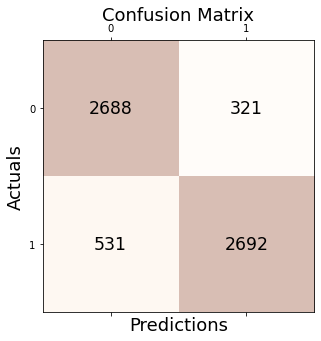

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true=predictions_xgboost["Target"], y_pred=predictions_xgboost["Predictions"])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print('F1 Score XGBoost: %.3f' % f1_score(predictions_xgboost["Target"], predictions_xgboost["Predictions"]))
print('F1 Score RandomForest: %.3f' % f1_score(predictions_rf["Target"], predictions_rf["Predictions"]))

F1 Score XGBoost: 0.863
F1 Score RandomForest: 0.809


Si bien tenemos buenas métricas en ambos casos, podemos hacer una evaluación de ambos modelos para analizar un poco más en profundidad las métricas.
Como vimos anteriormente, sabemos que el modelo se encuentra balanceado, por lo que la métrica de precision en este caso no nos dice mucho acerca de la performance del modelo, sin embargo ambas métricas son altas.
Si comparamos las métricas de recall, vemos que el modelo de XGBoost supera al de RandomForest por casi 6 puntos porcentuales, lo cual es bastante alto, y esto nos indica que el modelo clasifica correctamente los valores positivos dentro de todos los positivos que hay en el modelo. Dicho de otra forma, el modelo tiene una probabilidad del 83% de acertar que el precio de la acción sube de todas las veces que el precio efectivamente subió. Si usamos este modelo para tener de input en futuras entradas en long, esto es, apostar a que el precio va a subir y ganar con esto, tendremos un nivel de confianza bastante alto y puede que la mayoria de nuestras operaciones sean satisfactorias.
Si evaluamos el accuracy del modelo, sabiendo que el mismo se encuentra balanceado, podemos ver que también el modelo de XGBoost supera al RandomForest por casi 2 puntos porcentuales, lo cual no es mucho, pero sirve de parámetro para saber que el modelo acierta correctamente las predicciones tanto cuando el precio sube como cuando el precio baja, lo cual puede ser de gran utilidad si también queremos ejecutar operaciones de short.
Por último vamos a ver la métrica de F1-Score que nos da una visión más general acerca de la performance del modelo, y podemos concluir finalmente que el modelo de XGBoost supera al de RandomForest en todas las métricas, incluida ésta última.

In [ ]:
### REVISAR: Intentar mejorar el modelo con GridSearchCV. 
## Agregar un modelo de regresion logistica para usar como base y agregar un DecisionTree junto con random forest y xgboost. Revisar conclusiones y arreglar metricas.

## Parte II - Regresión

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#Agregar modelo baseline en base a la introduccion de la notebook.
dt_regressor = DecisionTreeRegressor()
rf_regressor = RandomForestRegressor()
xgb_regressor = xgb.XGBRegressor()
svr = SVR()

In [ ]:
df_btc_reg = df_btc[['close']]

In [ ]:
df_btc_reg.head()

,close
Fecha,
2019-03-09 19:00:00,3924.04
2019-03-09 23:00:00,3928.70
2019-03-10 03:00:00,3898.74
2019-03-10 07:00:00,3902.82
2019-03-10 11:00:00,3911.04


In [ ]:
future_periods = 15
df_btc_reg['pred'] = df_btc['close'].shift(-future_periods)

In [ ]:
df_btc_reg

,close,pred
Fecha,,
2019-03-09 19:00:00,3924.04,3880.02
2019-03-09 23:00:00,3928.70,3886.16
2019-03-10 03:00:00,3898.74,3877.37
2019-03-10 07:00:00,3902.82,3875.52
2019-03-10 11:00:00,3911.04,3850.00
...,...,...
2022-05-01 19:00:00,38306.63,NaN
2022-05-01 23:00:00,38621.62,NaN
2022-05-02 03:00:00,38926.11,NaN


La variable que vamos a predecir es el valor de cierre de BTC, y utilizaremos el mismo dataset que usamos anteriormente, para poder predecir el precio de cierre del activo en 15 períodos posteriores.

In [ ]:
X = np.array(df_btc_reg.drop(['pred'], 1))[:-future_periods]
y = np.array(df_btc_reg['pred'])[:-future_periods]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
dt_confidence = dt_regressor.score(X_test, y_test)
y_pred = dt_regressor.predict(X_test)
print("Decision Tree confidence: ", dt_confidence)
print("MAE: {}".format(mean_absolute_error(y_test, y_pred)))
print("RMSE: {}".format(math.sqrt(mean_squared_error(y_test, y_pred))))

Decision Tree confidence:  0.9814307745056338
MAE: 1579.1410917030564
RMSE: 2602.972211720662


In [ ]:
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
rf_confidence = rf_regressor.score(X_test, y_test)
print("RandomForest confidence: ", rf_confidence)
print("MAE: {}".format(mean_absolute_error(y_test, y_pred)))
print("RMSE: {}".format(math.sqrt(mean_squared_error(y_test, y_pred))))

RandomForest confidence:  0.986323298151041
MAE: 1367.0077692872749
RMSE: 2233.8979339216417


In [ ]:
xgb_regressor.fit(X_train, y_train)
y_pred_xgb = xgb_regressor.predict(X_test)
xgb_confidence = xgb_regressor.score(X_test, y_test)
print("XGBoost confidence: ", xgb_confidence)
print("MAE: {}".format(mean_absolute_error(y_test, y_pred_xgb)))
print("RMSE: {}".format(math.sqrt(mean_squared_error(y_test, y_pred_xgb))))

[15:33:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost confidence:  0.9905304032193858
MAE: 1141.8723184830444
RMSE: 1858.8244666527771


In [ ]:
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
svr_confidence = svr.score(X_test, y_test)
print("SVR confidence: ", svr_confidence)
print("MAE: {}".format(mean_absolute_error(y_test, y_pred)))
print("RMSE: {}".format(math.sqrt(mean_squared_error(y_test, y_pred))))

SVR confidence:  -0.23199919974114236
MAE: 15040.781964929349
RMSE: 21202.049767944885


In [ ]:
print(X.mean())
print(X.std())

25032.627137032185
18985.796922442416


In [ ]:
MAE_xgb = mean_absolute_error(y_test, y_pred_xgb)
RMSE_xgb = math.sqrt(mean_squared_error(y_test, y_pred_xgb))

In [ ]:
(MAE_xgb / X.mean())*100

4.561536079422555

In [ ]:
## Ver conclusiones en base a las metricas de los modelos.

# Comparación de métricas para regresión:

Habiendo hecho una regresión de la base de datos a través de cuatro métodos distintos (Desition Tree, Random Forest, Extreme Gradient Boosting y Support Vector Regression), obtuvimos de cada uno de ellos, diferentes métricas para medir el error de los valores obtenidos por regresión, comparándose con los valores de entrenamiento.


---

> **Desition Tree**


*   MAE           =  1554.662
*   RMSE          =  2552.255 
*   Confidence    =  0.98172

>**Random Forest**

*    MAE         =     1320.516 
*    RMSE        =     2128.990  
*    Confidence  =     0.98728

>**XGBoost**

* MAE =  1118.339
* RMSE = 1804.296
* Confidence    = 0.99086

>**SVR**

* MAE =14800.604
* RMSE        =20889.653 
* Confidence =-0.22458 


---






Comparando a simple vista el Error Absoluto Medio (MAE) entre los cuatro métodos utilizados, el que menor valor obtuvo y por lo tanto, el que mejor predice es el XGBoost, mientras que la peor estimación  es la del SVM,  mostrando un MAE de 14800, es decir un error 1200% más grande que el MAE de XGBoost. Lo mismo sucede con la raiz del error cuadrático medio o RMSE, donde el error más bajo se obtuvo con el XGBoost con 1804, mientras que el peor estimador volvió a ser el Support Vector Regressor con un RMSE de 20889, es decir u 1057% superior al XGBoost. 


---



En resumen, haciendo un ranking de los estimadores que mejor funcionaron en regresión son: 


1.   XGBoost
2.   Random Forest
3.   Desition tree
4.   SVR

La diferencia entre XGBoost y Random Forest es del 18% para el MAE y el RMSE mientras que para el Desition Tree es del 40 % para para las dos métricas tomadas, con respecto al primer puesto. 



Otro parámetro también medido para cada uno de los estimadores es el coeficiente de determinación R^2 , a través de la función score. Es posible ver que para XGBoost, Random Forest, Desition Tree, los valores de R^2 son muy buenos, entre 0.99 y 0.98 mientras que en el caso del SRV el R^2 da un valor negativo, de -0.2, es decir que este método no está adaptandose bien a la predicción del activo en cuestión. 
